In [59]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier

# Задание 3

1. Применить классификацию деревом решений с заданным max_depth к своему датасету. Построить график зависимости accuracy на тренировочном и тестовом поднаборах от max_depth дерева.
2. Найти GridSearchCV оптимальный max_depth.

In [ ]:
! pip install -q kaggle

from google.colab import files
files.upload()

! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

! kaggle datasets download -d mssmartypants/rice-type-classification

! unzip rice-type-classification.zip

## 0. Обзор датасета

In [60]:
df = pd.read_csv('riceClassification.csv')
df.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


In [62]:
print(df["Class"].nunique())

2


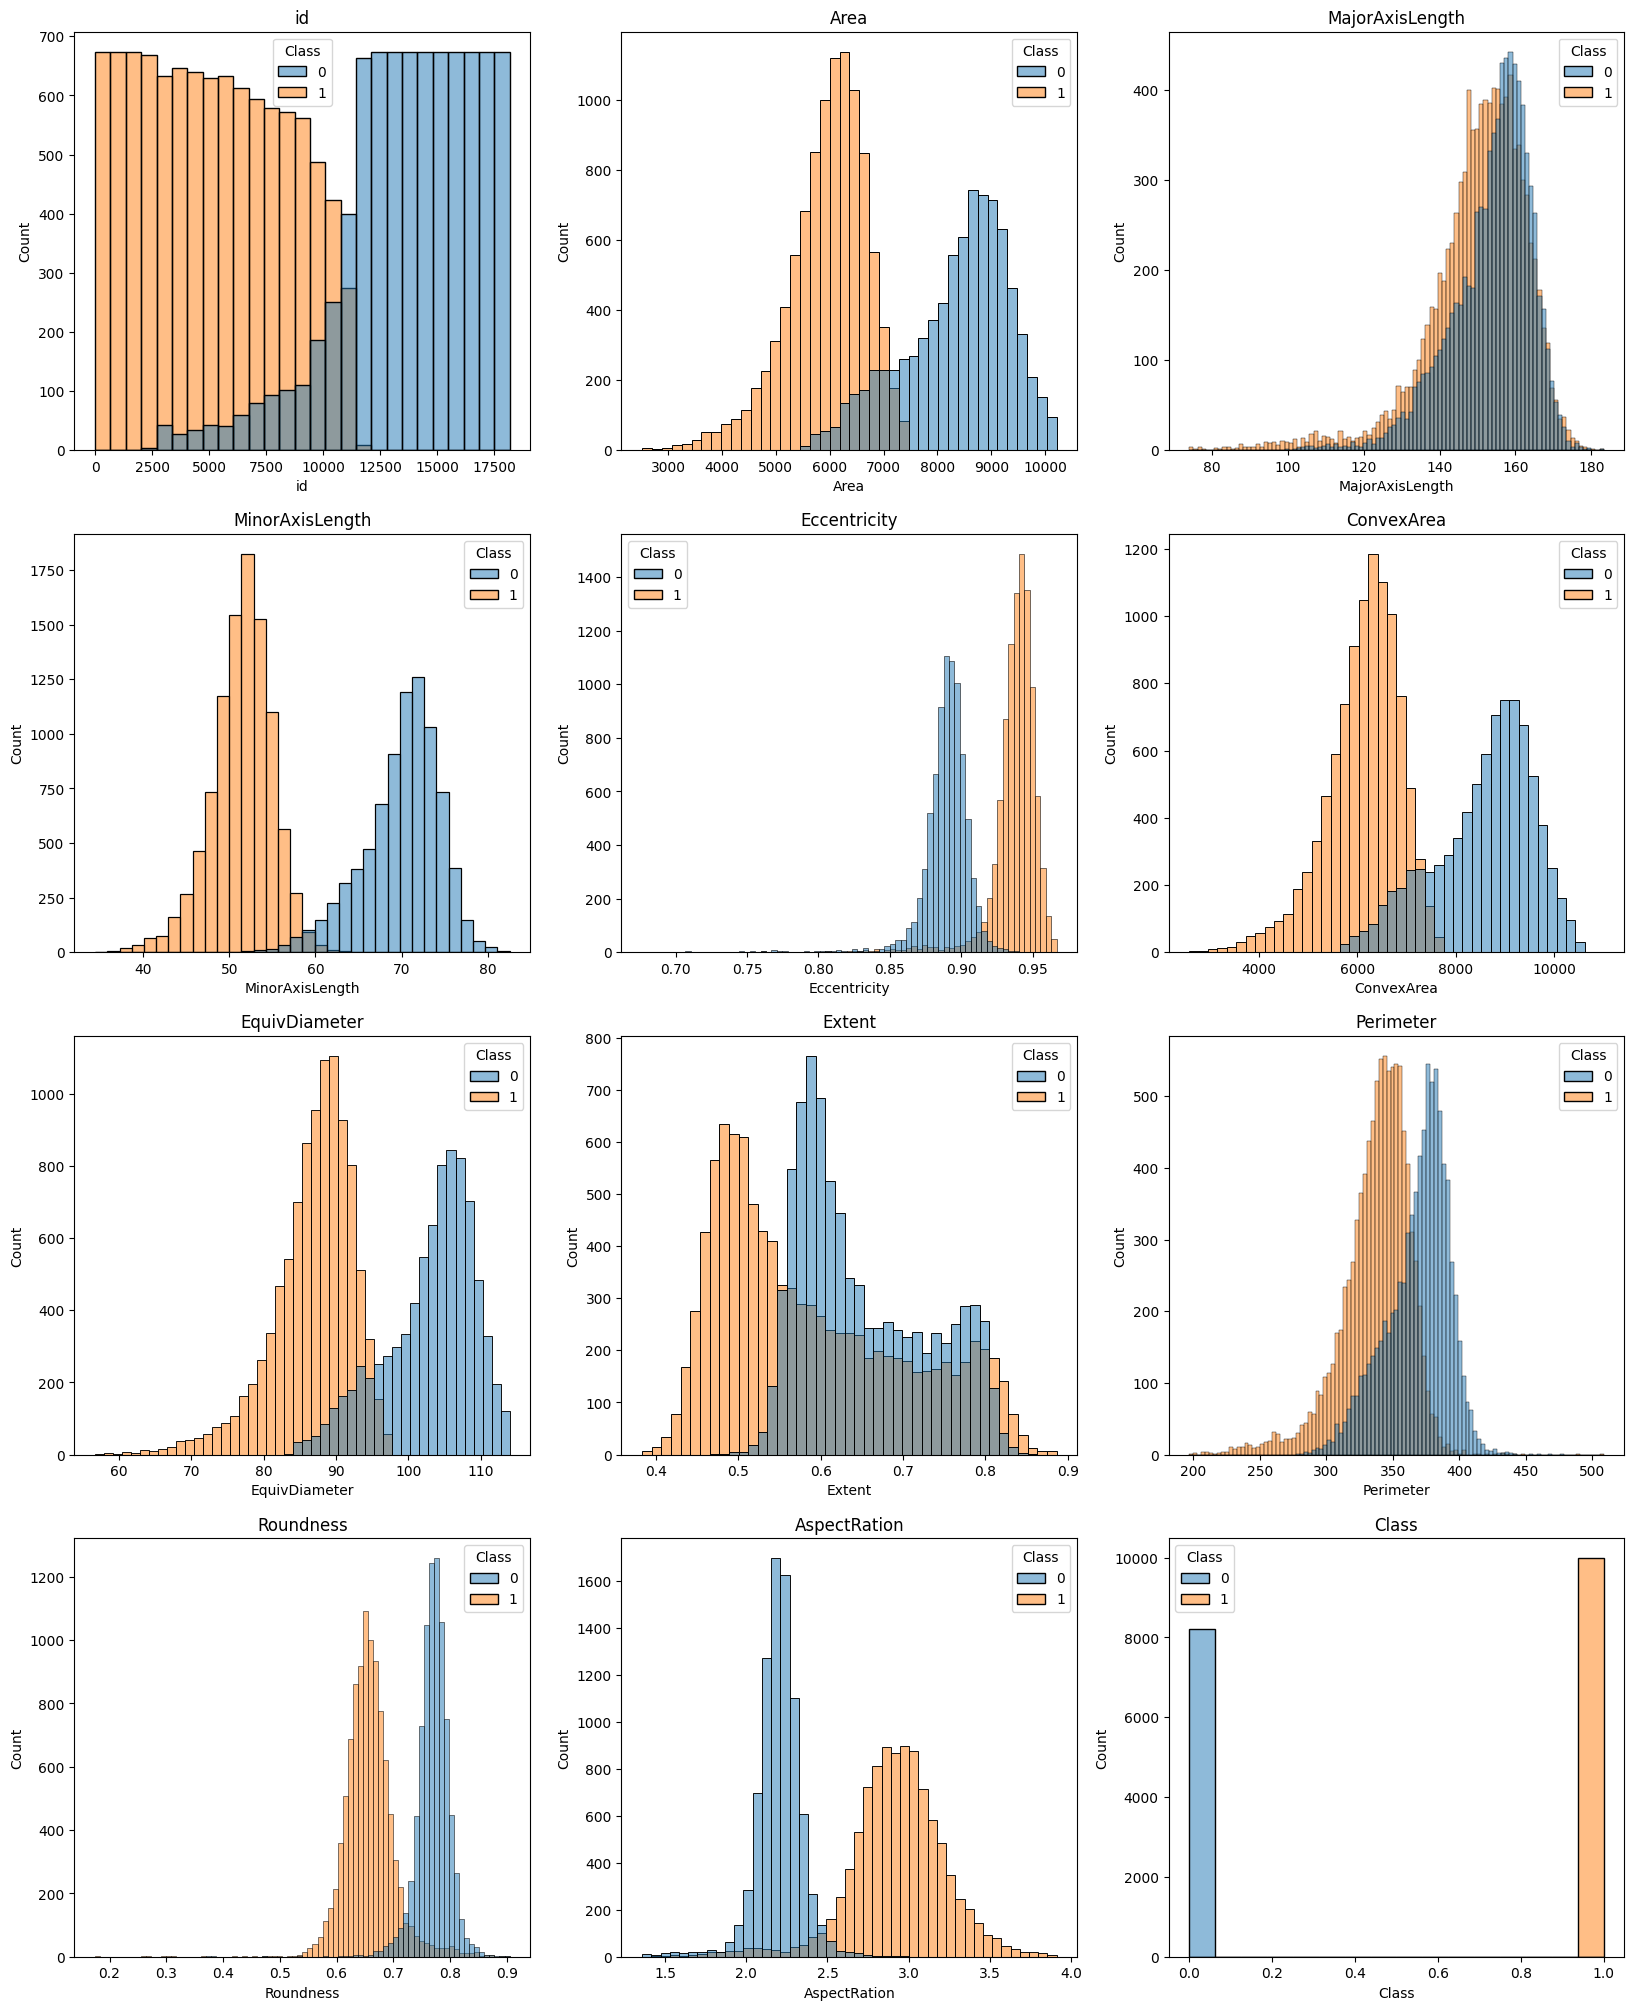

In [63]:
plt.figure(figsize=(20,25))
for i in range(12):
    plt.subplot(4, 3, i + 1)
    sns.histplot(data=df, x=df.columns[i],hue="Class")
    plt.title(df.columns[i])
plt.show()

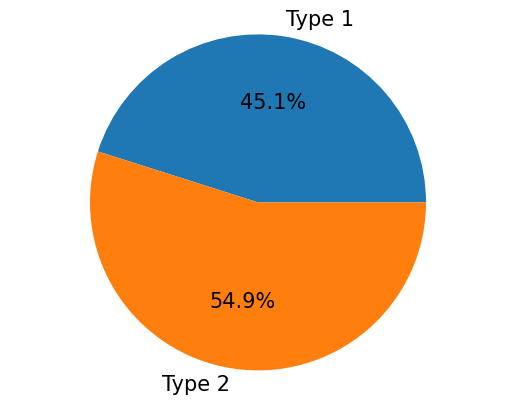

In [64]:
my_data = [df.loc[df["Class"]==0].shape[0], df.loc[df["Class"]==1].shape[0]]
my_labels = 'Type 1','Type 2'
plt.pie(my_data,labels=my_labels,autopct='%1.1f%%', textprops={'fontsize': 15})
plt.axis('equal')

plt.show()

## 1.1. Применить классификацию деревом решений с заданным max_depth к своему датасету

In [65]:
X = df.iloc[:, :-1].values
y = df.iloc[:, 11].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [66]:
clf = DecisionTreeClassifier()

In [67]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [68]:
y_pred = clf.predict(X_test)

In [69]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


In [70]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 100.00%


[Text(0.4, 0.9, 'x[3] <= 58.579\ngini = 0.495\nsamples = 14548\nvalue = [6541, 8007]'),
 Text(0.2, 0.7, 'x[0] <= 12148.5\ngini = 0.027\nsamples = 8012\nvalue = [111, 7901]'),
 Text(0.1, 0.5, 'gini = 0.0\nsamples = 7901\nvalue = [0, 7901]'),
 Text(0.3, 0.5, 'gini = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Text(0.6, 0.7, 'x[0] <= 2432.0\ngini = 0.032\nsamples = 6536\nvalue = [6430, 106]'),
 Text(0.5, 0.5, 'gini = 0.0\nsamples = 105\nvalue = [0, 105]'),
 Text(0.7, 0.5, 'x[4] <= 0.932\ngini = 0.0\nsamples = 6431\nvalue = [6430, 1]'),
 Text(0.6, 0.3, 'gini = 0.0\nsamples = 6429\nvalue = [6429, 0]'),
 Text(0.8, 0.3, 'x[4] <= 0.934\ngini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.7, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.9, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

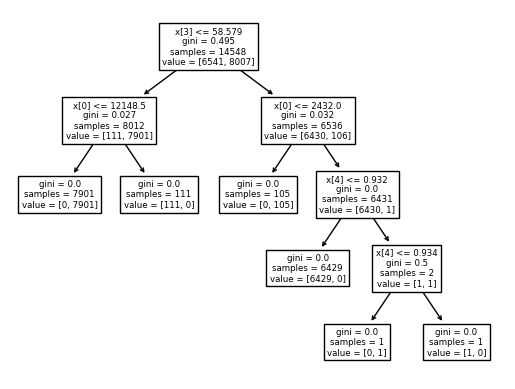

In [71]:
plot_tree(clf)

## 1.2. Построить график зависимости accuracy на тренировочном и тестовом поднаборах от max_depth дерева.

In [72]:
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [73]:
y_pred = clf.predict(X_test)

In [74]:
confusion_matrix = confusion_matrix(y_test, y_pred)

In [75]:
print(confusion_matrix)

[[1659    0]
 [   0 1978]]


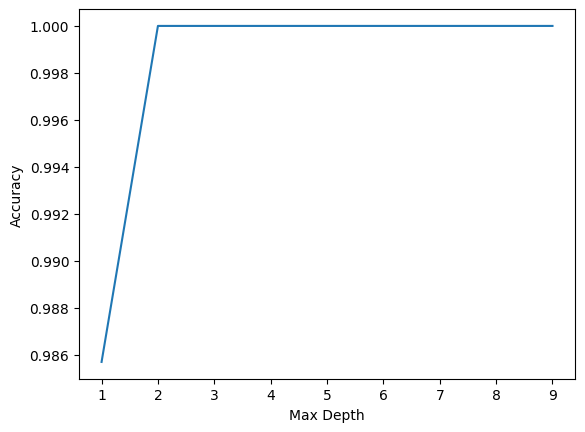

In [76]:
max_depths = range(1, 10)
accuracies = []

for max_depth in max_depths:
    clf = DecisionTreeClassifier(max_depth=max_depth)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

plt.plot(max_depths, accuracies)
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.show()

## 2. Найти GridSearchCV оптимальный max_depth.

In [77]:
parameters = {'max_depth': range(1, 101)}

In [78]:
grid_search = GridSearchCV(clf, parameters, cv=5)

In [79]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=9),
             param_grid={'max_depth': range(1, 101)})

In [80]:
best_parameters = grid_search.best_params_

In [81]:
clf = DecisionTreeClassifier(**best_parameters)

In [82]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [83]:
y_pred = clf.predict(X_test)

In [84]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 1.0


[Text(0.4444444444444444, 0.875, 'x[3] <= 58.579\ngini = 0.495\nsamples = 14548\nvalue = [6541, 8007]'),
 Text(0.2222222222222222, 0.625, 'x[0] <= 12148.5\ngini = 0.027\nsamples = 8012\nvalue = [111, 7901]'),
 Text(0.1111111111111111, 0.375, 'gini = 0.0\nsamples = 7901\nvalue = [0, 7901]'),
 Text(0.3333333333333333, 0.375, 'gini = 0.0\nsamples = 111\nvalue = [111, 0]'),
 Text(0.6666666666666666, 0.625, 'x[0] <= 2432.0\ngini = 0.032\nsamples = 6536\nvalue = [6430, 106]'),
 Text(0.5555555555555556, 0.375, 'gini = 0.0\nsamples = 105\nvalue = [0, 105]'),
 Text(0.7777777777777778, 0.375, 'x[4] <= 0.932\ngini = 0.0\nsamples = 6431\nvalue = [6430, 1]'),
 Text(0.6666666666666666, 0.125, 'gini = 0.0\nsamples = 6429\nvalue = [6429, 0]'),
 Text(0.8888888888888888, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]')]

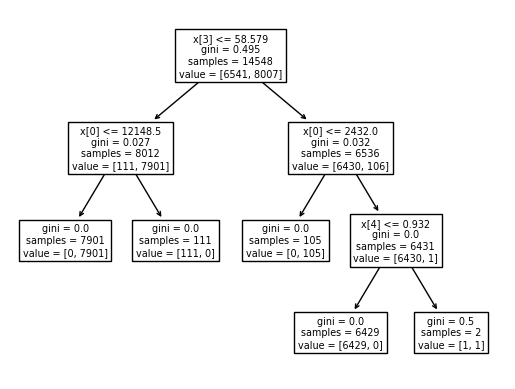

In [85]:
plot_tree(clf)

## 3. Применение одного из бустовых классификаторов

In [86]:
feature_names = df.columns.tolist()
del feature_names[0]

feature_names

['Area',
 'MajorAxisLength',
 'MinorAxisLength',
 'Eccentricity',
 'ConvexArea',
 'EquivDiameter',
 'Extent',
 'Perimeter',
 'Roundness',
 'AspectRation',
 'Class']

In [87]:
clf = GradientBoostingClassifier()
clf.fit(X_train, y_train)

GradientBoostingClassifier()

## 4. Визуализизация оценки важности признаков

In [88]:
feature_importance = pd.DataFrame({'feature_name': feature_names, 'importance': clf.feature_importances_})
print(feature_importance)

       feature_name    importance
0              Area  5.912917e-02
1   MajorAxisLength  1.173446e-17
2   MinorAxisLength -2.545937e-17
3      Eccentricity  9.407050e-01
4        ConvexArea  5.103779e-05
5     EquivDiameter  0.000000e+00
6            Extent  1.076554e-19
7         Perimeter  4.572363e-06
8         Roundness -9.559854e-17
9      AspectRation  1.261303e-16
10            Class  1.102142e-04


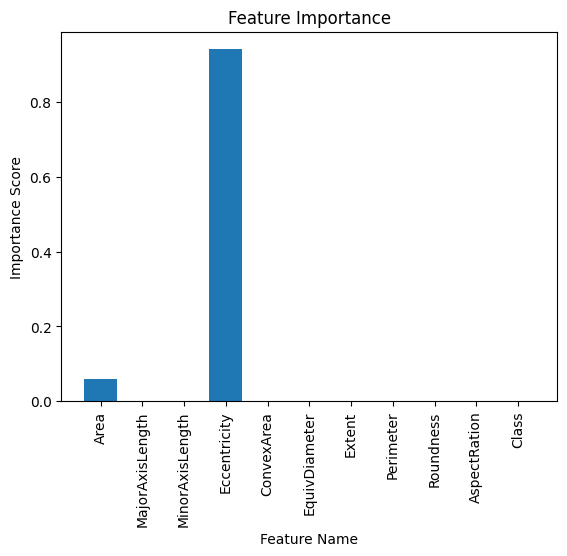

In [89]:
plt.bar(feature_importance['feature_name'], feature_importance['importance'])
plt.title('Feature Importance')
plt.xlabel('Feature Name')
plt.ylabel('Importance Score')
plt.xticks(rotation=90)
plt.show()